In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('feature_Selection.csv')
df.head()

,PriorDefault_t,YearsEmployed,CreditScore,Income,Approved
0,1,1.25,1,321.692754,1
1,1,3.04,6,560.000000,1
2,1,1.50,0,824.000000,1
3,1,3.75,5,3.000000,1
4,1,1.71,0,321.692754,1


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Approved',axis=1))

In [5]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,PriorDefault_t,YearsEmployed,CreditScore,Income
0,0.95465,-0.300502,-0.324711,-0.288910
1,0.95465,0.379591,1.079116,0.211684
2,0.95465,-0.205517,-0.605477,0.766248
3,0.95465,0.649348,0.798351,-0.958363
4,0.95465,-0.125730,-0.605477,-0.288910


In [6]:
#### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(scaled_features,df['Approved'],test_size=0.20,random_state=10)

In [7]:
y_test.shape

(138,)

In [8]:
y_test.value_counts()

0    70
1    68
Name: Approved, dtype: int64

In [9]:
y_train.value_counts()

0    313
1    239
Name: Approved, dtype: int64

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier(n_neighbors=1).fit(X_train,y_train)
prediction=knn_classifier.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve, roc_auc_score
print(f'confusion matrix : {confusion_matrix(y_test,prediction)}')
print(f'Accuracy Score : {accuracy_score(y_test,prediction)}')
print(classification_report(y_test,prediction))

confusion matrix : [[58 12]
 [19 49]]
Accuracy Score : 0.7753623188405797
              precision    recall  f1-score   support

           0       0.75      0.83      0.79        70
           1       0.80      0.72      0.76        68

    accuracy                           0.78       138
   macro avg       0.78      0.77      0.77       138
weighted avg       0.78      0.78      0.77       138



In [12]:
y_test.value_counts()

0    70
1    68
Name: Approved, dtype: int64

In [13]:
auc = roc_auc_score(y_test, prediction)
auc

0.7745798319327731

In [14]:
fpr, tpr, thresholds = roc_curve(y_test, prediction)

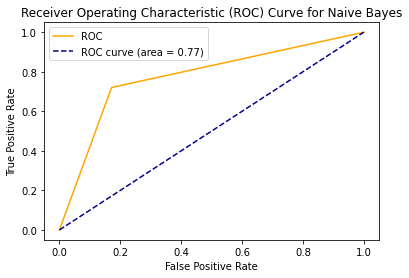

In [15]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes')
plt.legend()
plt.show()

In [16]:
from sklearn.model_selection import RandomizedSearchCV
random_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [17]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
Classifier=KNeighborsClassifier()

In [18]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
knn_random = RandomizedSearchCV(estimator = Classifier, param_distributions = random_grid, cv = 5, verbose=2)

In [19]:
knn_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .......algorithm=brute, leaf_size=32, n_neighbors=9; total time=   0.0s
[CV] END .......algorithm=brute, leaf_size=32, n_neighbors=9; total time=   0.0s
[CV] END .......algorithm=brute, leaf_size=32, n_neighbors=9; total time=   0.0s
[CV] END .......algorithm=brute, leaf_size=32, n_neighbors=9; total time=   0.0s
[CV] END .......algorithm=brute, leaf_size=32, n_neighbors=9; total time=   0.0s
[CV] END ..algorithm=ball_tree, leaf_size=32, n_neighbors=12; total time=   0.0s
[CV] END ..algorithm=ball_tree, leaf_size=32, n_neighbors=12; total time=   0.0s
[CV] END ..algorithm=ball_tree, leaf_size=32, n_neighbors=12; total time=   0.0s
[CV] END ..algorithm=ball_tree, leaf_size=32, n_neighbors=12; total time=   0.0s
[CV] END ..algorithm=ball_tree, leaf_size=32, n_neighbors=12; total time=   0.0s
[CV] END .....algorithm=kd_tree, leaf_size=27, n_neighbors=9; total time=   0.0s
[CV] END .....algorithm=kd_tree, leaf_size=27, n

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute'],
                                        'leaf_size': [18, 20, 25, 27, 30, 32,
                                                      34],
                                        'n_neighbors': [3, 5, 7, 9, 10, 11, 12,
                                                        13]},
                   verbose=2)

In [20]:
knn_random.best_params_

{'n_neighbors': 13, 'leaf_size': 34, 'algorithm': 'brute'}

In [21]:
best_random_grid=knn_random.best_estimator_

In [22]:
print(best_random_grid)

KNeighborsClassifier(algorithm='brute', leaf_size=34, n_neighbors=13)


In [23]:
from sklearn.metrics import accuracy_score,accuracy_score,roc_curve, roc_auc_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[63  7]
 [13 55]]
Accuracy Score 0.855072463768116
Classification report:               precision    recall  f1-score   support

           0       0.83      0.90      0.86        70
           1       0.89      0.81      0.85        68

    accuracy                           0.86       138
   macro avg       0.86      0.85      0.85       138
weighted avg       0.86      0.86      0.85       138



In [24]:
#k-fold cross validation
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5,random_state=None)
kfold.get_n_splits(scaled_features)

5

In [25]:
from statistics import mean
knn = KNeighborsClassifier(algorithm = 'brute', leaf_size =18, n_neighbors =10)

cnt =0
count=[]
train_score =[]
test_score = []

for train_index,test_index in kfold.split(scaled_features):
    X_train, X_test = scaled_features[train_index], scaled_features[test_index] # our scaled data is an array so it can work on x[value]
    y_train, y_test = df['Approved'].iloc[train_index], df['Approved'].iloc[test_index] # y is a dataframe so we have to use "iloc" to retreive data
    knn.fit(X_train,y_train)
    train_score_ = knn.score(X_train,y_train)
    test_score_ =  knn.score(X_test,y_test)
    cnt+=1
    count.append(cnt)
    train_score.append(train_score_)
    test_score.append(test_score_)
    
    print("for k = ", cnt)
    print("train_score is :  ", train_score_, "and test score is :  ", test_score_)
print("************************************************")
print("************************************************")
print("Average train score is :  ", mean(train_score))
print("Average test score is :  ", mean(test_score))

for k =  1
train_score is :   0.9112318840579711 and test score is :   0.6666666666666666
for k =  2
train_score is :   0.8713768115942029 and test score is :   0.7463768115942029
for k =  3
train_score is :   0.8478260869565217 and test score is :   0.9347826086956522
for k =  4
train_score is :   0.8695652173913043 and test score is :   0.8115942028985508
for k =  5
train_score is :   0.8605072463768116 and test score is :   0.8840579710144928
************************************************
************************************************
Average train score is :   0.8721014492753624
Average test score is :   0.808695652173913


([<matplotlib.axis.YTick at 0x1ccb9c69048>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

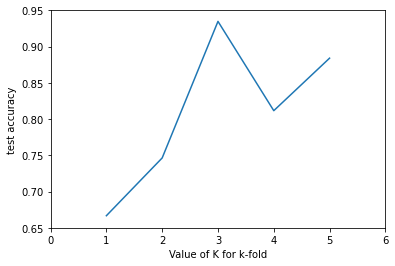

In [26]:
# let's plot the test_accuracy with the value of k in k-fold

plt.plot(count,test_score)
plt.xlabel('Value of K for k-fold')
plt.ylabel('test accuracy')
plt.xticks(np.arange(0, 7, 1)) 
plt.yticks(np.arange(0.65, 1, 0.05))

In [27]:
y_test.value_counts()

0    86
1    52
Name: Approved, dtype: int64

In [28]:
y_test.shape

(138,)

In [29]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(accuracy_score(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

0.8913043478260869


[[85  1]
 [14 38]]


              precision    recall  f1-score   support

           0       0.86      0.99      0.92        86
           1       0.97      0.73      0.84        52

    accuracy                           0.89       138
   macro avg       0.92      0.86      0.88       138
weighted avg       0.90      0.89      0.89       138



In [30]:
# Area Under Curve
auc = roc_auc_score(y_test, pred)
auc

0.8595706618962433

In [31]:
fpr, tpr, thresholds = roc_curve(y_test, pred)

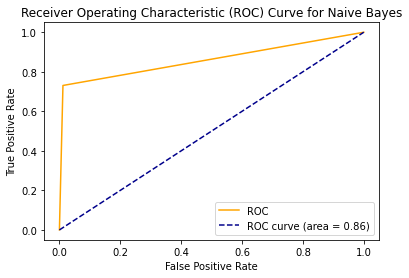

In [32]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes')
plt.legend()
plt.show()

In [33]:
import pickle
# save the model to disk
filename = 'finalized_model_knn.sav'
pickle.dump(knn,open(filename,'wb'))